# Model Building - Predict if an animal will stay for a short, medium or long time

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = os.path.join("animal_shelter_engineered.csv")
animal_data = pd.read_csv(DATA_DIR, index_col=0)

In [3]:
animal_data

,age_upon_intake_(days),intake_number,time_in_shelter_days,outcome_type,animal_type_Dog,intake_type_Public Assist,intake_type_Stray,intake_month_2,intake_month_3,intake_month_4,intake_month_5,intake_month_6,intake_month_7,intake_month_8,intake_month_9,intake_month_10,intake_month_11,intake_month_12,Intake_Neutered_Neutered,Intake_Sex_Male,White,Black,Grey,Yellow,Red,Blue,Tricolor,Brown,Orange,Sporting,Hound,Working,Terrier,Toy,Non_Sporting,Herding,Longhaired,Mediumhaired,Shorthaired
0,3650,1.0,0.588194,Return to Owner,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2555,2.0,1.259722,Return to Owner,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2190,3.0,1.113889,Return to Owner,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5475,1.0,0.178472,Return to Owner,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5475,1.0,0.213194,Return to Owner,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,5475,1.0,6.258333,Return to Owner,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,6570,1.0,0.054167,Return to Owner,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,5840,1.0,3.897222,Return to Owner,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,5840,1.0,49.747917,Adoption,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9,4745,1.0,10.886111,Return to Owner,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


**predictor variables:**  
animal_type --> turn into binary column  
breed (just binary columns)  
color (just binary columns)  
intake_type --> turn into binary columns  
age_upon_intake_(days)   
intake_month --> turn into binary column  
intake_number   
Intake_Neutered --> turn into binary column   
Intake_Sex --> turn into binary columns   
  
**response variable:**  
time_in_shelter_days  

In [4]:
animal_data.head()

,age_upon_intake_(days),intake_number,time_in_shelter_days,outcome_type,animal_type_Dog,intake_type_Public Assist,intake_type_Stray,intake_month_2,intake_month_3,intake_month_4,intake_month_5,intake_month_6,intake_month_7,intake_month_8,intake_month_9,intake_month_10,intake_month_11,intake_month_12,Intake_Neutered_Neutered,Intake_Sex_Male,White,Black,Grey,Yellow,Red,Blue,Tricolor,Brown,Orange,Sporting,Hound,Working,Terrier,Toy,Non_Sporting,Herding,Longhaired,Mediumhaired,Shorthaired
0,3650,1.0,0.588194,Return to Owner,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2555,2.0,1.259722,Return to Owner,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2190,3.0,1.113889,Return to Owner,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5475,1.0,0.178472,Return to Owner,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5475,1.0,0.213194,Return to Owner,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Transform Y into sqrt (Y)

**Provides a more normal distribution**

In [5]:
#normal Y 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


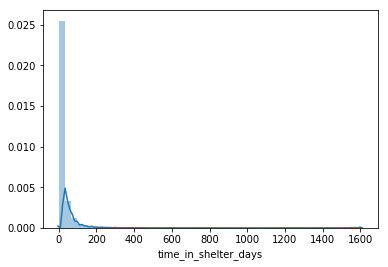

In [6]:
y = animal_data.time_in_shelter_days
ax = sns.distplot(y);

In [7]:
#sqrt Y

In [8]:
animal_data['sqrty'] = np.sqrt(animal_data.time_in_shelter_days)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


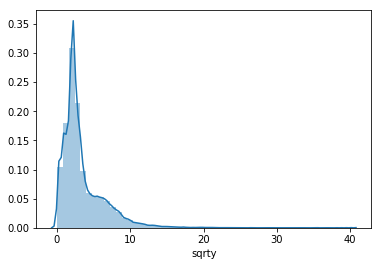

In [9]:
y = animal_data.sqrty
ax = sns.distplot(y);

In [10]:
#let's drop the original Y column

In [11]:
animal_data.drop(['time_in_shelter_days'], axis=1, inplace=True)

# Remove above / below outliers

In [12]:
from numpy import NaN

In [13]:
animal_data[animal_data['sqrty'] > 9].shape

(2268, 39)

In [14]:
animal_data.loc[animal_data['sqrty'] > 9, "sqrty"] = NaN


In [15]:
animal_data.dropna(how='any', inplace=True) 

In [16]:
animal_data.shape

(42644, 39)

In [17]:
animal_data.reset_index(inplace=True, drop=True)

# Let's look at the distribution of our y now

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


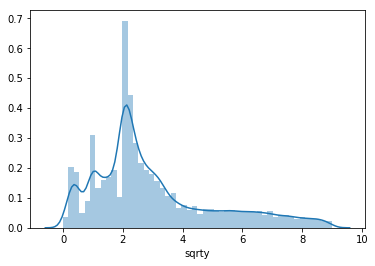

In [18]:
y = animal_data.sqrty
ax = sns.distplot(y);

## make our y a categorical variable (short, medium, long) 

In [19]:
animal_data['length_of_stay'] = 0 

animal_data.loc[animal_data['sqrty'] <= 2, "length_of_stay"] = 0 #short
animal_data.loc[(animal_data['sqrty'] > 2) & (animal_data['sqrty'] < 3), "length_of_stay"] = 1 #medium
animal_data.loc[animal_data['sqrty'] > 3, "length_of_stay"] = 2 #long

In [20]:
animal_data.drop(['sqrty'], axis=1, inplace=True)

In [21]:
df = animal_data[animal_data.length_of_stay == 0]

In [22]:
df.shape


(13165, 39)

In [23]:
df = animal_data[animal_data.length_of_stay == 1]

In [24]:
df.shape

(14019, 39)

In [25]:
df = animal_data[animal_data.length_of_stay == 2]

In [26]:
df.shape

(15460, 39)

# Drop the columns that aren't important for modeling

In [27]:
animal_data.drop(['intake_number', 'intake_month_2', 'intake_month_3', 'intake_month_4', 'intake_month_5', 'intake_month_6', 'intake_month_7', 'intake_month_8', 'intake_month_9', 'intake_month_10', 'intake_month_11', 'intake_month_12'], axis=1, inplace=True)

In [28]:
#let's make a copy for our modeling

copy_data = animal_data.copy()

# Model Building

In [29]:
copy_data.head()

,age_upon_intake_(days),outcome_type,animal_type_Dog,intake_type_Public Assist,intake_type_Stray,Intake_Neutered_Neutered,Intake_Sex_Male,White,Black,Grey,Yellow,Red,Blue,Tricolor,Brown,Orange,Sporting,Hound,Working,Terrier,Toy,Non_Sporting,Herding,Longhaired,Mediumhaired,Shorthaired,length_of_stay
0,3650,Return to Owner,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2555,Return to Owner,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2190,Return to Owner,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5475,Return to Owner,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5475,Return to Owner,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Let's only look at Adoption animals

In [30]:
adopted_df = copy_data[copy_data.outcome_type == 'Adoption']

In [31]:
adopted_df.drop(['outcome_type'], axis=1, inplace=True)
adopted_df.reset_index(inplace=True, drop=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Split Train and Test sets

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adopted_df.loc[:, adopted_df.columns != 'length_of_stay'], adopted_df.length_of_stay, test_size=0.2, random_state =1234)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## GradientBoostingClassifier

In [33]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
#40 n_estimators is best so far


#create pipeline
pipe = Pipeline([('gbc', GradientBoostingClassifier())])
#set param_grid
param_grid = {'gbc__n_estimators':[150, 160]}
#grid search through the parameters 
grid2 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid2.fit(X_train, y_train)

grid2.best_params_

{'gbc__n_estimators': 160}

In [35]:
y_test_pred = grid2.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred) 
#with all: 0.6588

0.6598615916955017

In [36]:
from sklearn.cross_validation import cross_val_score
linreg_scores = cross_val_score(grid2, X_train, y_train, cv=3)
linreg_scores.mean()

#with all: 0.66

0.6598183395274386

# SVC

In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC(C=5)
#fit it to my data 
svc.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_test_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred) 

#0.655

0.6477508650519032

In [41]:
from sklearn.cross_validation import cross_val_score
linreg_scores = cross_val_score(svc, X_train, y_train, cv=3)
linreg_scores.mean()

0.6513413769347268

## RFC

In [42]:


from sklearn.ensemble import RandomForestClassifier
#create pipeline
pipe = Pipeline([('rfc', RandomForestClassifier())])
#set param_grid
param_grid = {'rfc__n_estimators':[30,40,50,60,100], 'rfc__max_features':[1,5,10,20], 'rfc__max_depth':[None, 1, 2]}
#grid search through the parameters 
grid4 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid4.fit(X_train, y_train)

grid4.best_params_

{'rfc__max_depth': None, 'rfc__max_features': 10, 'rfc__n_estimators': 100}

In [43]:
y_test_pred = grid4.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred) 

0.62560553633218

## KNClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#create pipeline
pipe = Pipeline([('knc', KNeighborsClassifier())])
#set param_grid
param_grid = {'knc__n_neighbors':[1,5,10,20,50], 'knc__weights':['uniform', 'distance'], 'knc__leaf_size':[10,20,30,40,50]}
#grid search through the parameters 
grid5 = GridSearchCV(pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True)
#fit it to my data 
grid5.fit(X_train, y_train)

grid5.best_params_

{'knc__leaf_size': 40, 'knc__n_neighbors': 20, 'knc__weights': 'uniform'}

In [46]:
y_test_pred = grid5.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred) 

0.6259515570934256

# XGBoost Classifier - my BEST model!

In [48]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [49]:
#already optimized parameters
xgb = XGBClassifier(objective='multi:softprob', num_class=3, max_depth = 4, n_estimators = 110, n_jobs = 5)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=110,
       n_jobs=5, nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [50]:
from sklearn.metrics import accuracy_score

y_test_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

#with all:0.6602

0.6602076124567474


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
xgb.feature_importances_

array([0.31802365, 0.0519601 , 0.02945952, 0.04592902, 0.05938298,
       0.03108327, 0.04940849, 0.04894456, 0.02064486, 0.01438181,
       0.01229413, 0.02296451, 0.0157736 , 0.03479471, 0.02064486,
       0.02783577, 0.03201113, 0.01043841, 0.0361865 , 0.03525864,
       0.03409882, 0.01530967, 0.01299003, 0.00301554, 0.01716539],
      dtype=float32)

# Ensemble Method - (SVC & XGBoost)

In [53]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=110,
       n_jobs=5, nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [54]:
svc

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(leaf_size=10, n_neighbors = 20)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
vc = VotingClassifier(estimators=[('xgb', xgb), ('svc', svc), ('knc', knc)], voting='hard')
vc = vc.fit(X_train, y_train)

In [58]:
from sklearn.metrics import accuracy_score

y_test_pred = vc.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6534602076124567


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Save the model with pickle

In [60]:
import pickle
pickle.dump(xgb,open("xgbmodel.pkl",'wb'))

# Save the dataframe

In [61]:
cat = adopted_df.drop('length_of_stay',axis=1)

In [62]:
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

In [63]:
import pickle
pickle.dump(index_dict,open("cat",'wb')) 